# 55

In [2]:
import IPython; IPython.display.HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.nbinput').show(); } else { $('div.nbinput').hide(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## 829. Consecutive Numbers Sum
Hard

Given a positive integer N, how many ways can we write it as a sum of consecutive positive integers?

Example 1:

    Input: 5
    Output: 2
    Explanation: 5 = 5 = 2 + 3

In [3]:
from math import sqrt, ceil, floor, isclose

def consecutiveNumbersSum(N):
    '''
    Answer is number of odd divisors of N
    
    range(1, ceil(sqrt(N)), 2) is all odd numbers up to floor(sqrt(N)) 
    when N is not a perfect square, in which case ceil = floor + 1. 
    
    If N is a perfect square, on the other hand, ceil(sqrt(N)) and floor(sqrt(N)) are equal,
    and range(1, ceil(sqrt(N)), 2) is all odd numbers up to sqrt(N) - 1
    '''
    while N%2 == 0:
        N /= 2

    if isclose(floor(sqrt(N))**2, N):
        
        return 2*sum(1 for i in range(1, ceil(sqrt(N)), 2) if N%i == 0) + 1

    else:
        return 2*sum(1 for i in range(1, ceil(sqrt(N)), 2) if N%i == 0)

consecutiveNumbersSum(5)

2

## 752. Open the Lock

Medium

You have a lock in front of you with 4 circular wheels. Each wheel has 10 slots: '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'. The wheels can rotate freely and wrap around: for example we can turn '9' to be '0', or '0' to be '9'. Each move consists of turning one wheel one slot.

The lock initially starts at '0000', a string representing the state of the 4 wheels.

You are given a list deadends of dead ends, meaning if the lock displays any of these codes, the wheels of the lock will stop turning and you will be unable to open it.

Given a target representing the value of the wheels that will unlock the lock, return the minimum total number of turns required to open the lock, or -1 if it is impossible.
 

Example 1:

    Input: deadends = ["0201","0101","0102","1212","2002"], target = "0202"
    Output: 6
    Explanation:
    A sequence of valid moves would be "0000" -> "1000" -> "1100" -> "1200" -> "1201" -> "1202" -> "0202".
    Note that a sequence like "0000" -> "0001" -> "0002" -> "0102" -> "0202" would be invalid,
    because the wheels of the lock become stuck after the display becomes the dead end "0102".
 

Constraints:

    1 <= deadends.length <= 500
    deadends[i].length == 4
    target.length == 4
    target will not be in the list deadends.
    target and deadends[i] consist of digits only.



In [11]:
# partially from LeetCode official solution

import collections

deadends = ["0201","0101","0102","1212","2002"]
target = "0202"

def openLock(deadends, target):
    def neighbors(state):
        for i, c in enumerate(state):
            yield state[:i] + str((int(c)+1)%10) + state[i+1:]
            yield state[:i] + str((int(c)-1)%10) + state[i+1:]
            
    queue = collections.deque([('0000', 0)])
    dead = set(deadends)
    seen = set(['0000'])
    
    while queue:
        state, n_moves = queue.popleft()
        if state == target: return n_moves
        if state in dead: continue           # 一定要放這裡，不能放在下面的 if，不然遇到 deadends = ['0000'] 會錯
        for neighbor in neighbors(state):
            if neighbor not in seen:
                seen.add(neighbor)
                queue.append((neighbor, n_moves+1))
    return -1

openLock(deadends, target)

6

## 1248. Count Number of Nice Subarrays

Medium

Given an array of integers nums and an integer k. A continuous subarray is called nice if there are k odd numbers on it.

Return the number of nice sub-arrays.

 

Example 1:

    Input: nums = [1,1,2,1,1], k = 3
    Output: 2
    Explanation: The only sub-arrays with 3 odd numbers are [1,1,2,1] and [1,2,1,1].


In [19]:
import numpy as np

nums = [1, 1, 2, 1, 1]
k = 3

def numberOfSubarrays(nums, k):
    nums = [1] + nums + [1]
    oddIdxDiff = np.diff([i for i, n in enumerate(nums) if n%2==1])
    return oddIdxDiff[k:] @ oddIdxDiff[:-k]

numberOfSubarrays(nums, k)

2

## 588. Design In-Memory File System
Hard

Design an in-memory file system to simulate the following functions:

* ```ls```: Given a path in string format. If it is a file path, return a list that only contains this file's name. If it is a directory path, return the list of file and directory names in this directory. Your output (file and directory names together) should in lexicographic order.
* ```mkdir```: Given a directory path that does not exist, you should make a new directory according to the path. If the middle directories in the path don't exist either, you should create them as well. This function has void return type.
* ```addContentToFile```: Given a file path and file content in string format. If the file doesn't exist, you need to create that file containing given content. If the file already exists, you need to append given content to original content. This function has void return type.
* ```readContentFromFile```: Given a file path, return its content in string format.

Example:

    Input: 
    ["FileSystem","ls","mkdir","addContentToFile","ls","readContentFromFile"]
    [[],["/"],["/a/b/c"],["/a/b/c/d","hello"],["/"],["/a/b/c/d"]]

    Output:
    [null,[],null,null,["a"],"hello"]

    Explanation:

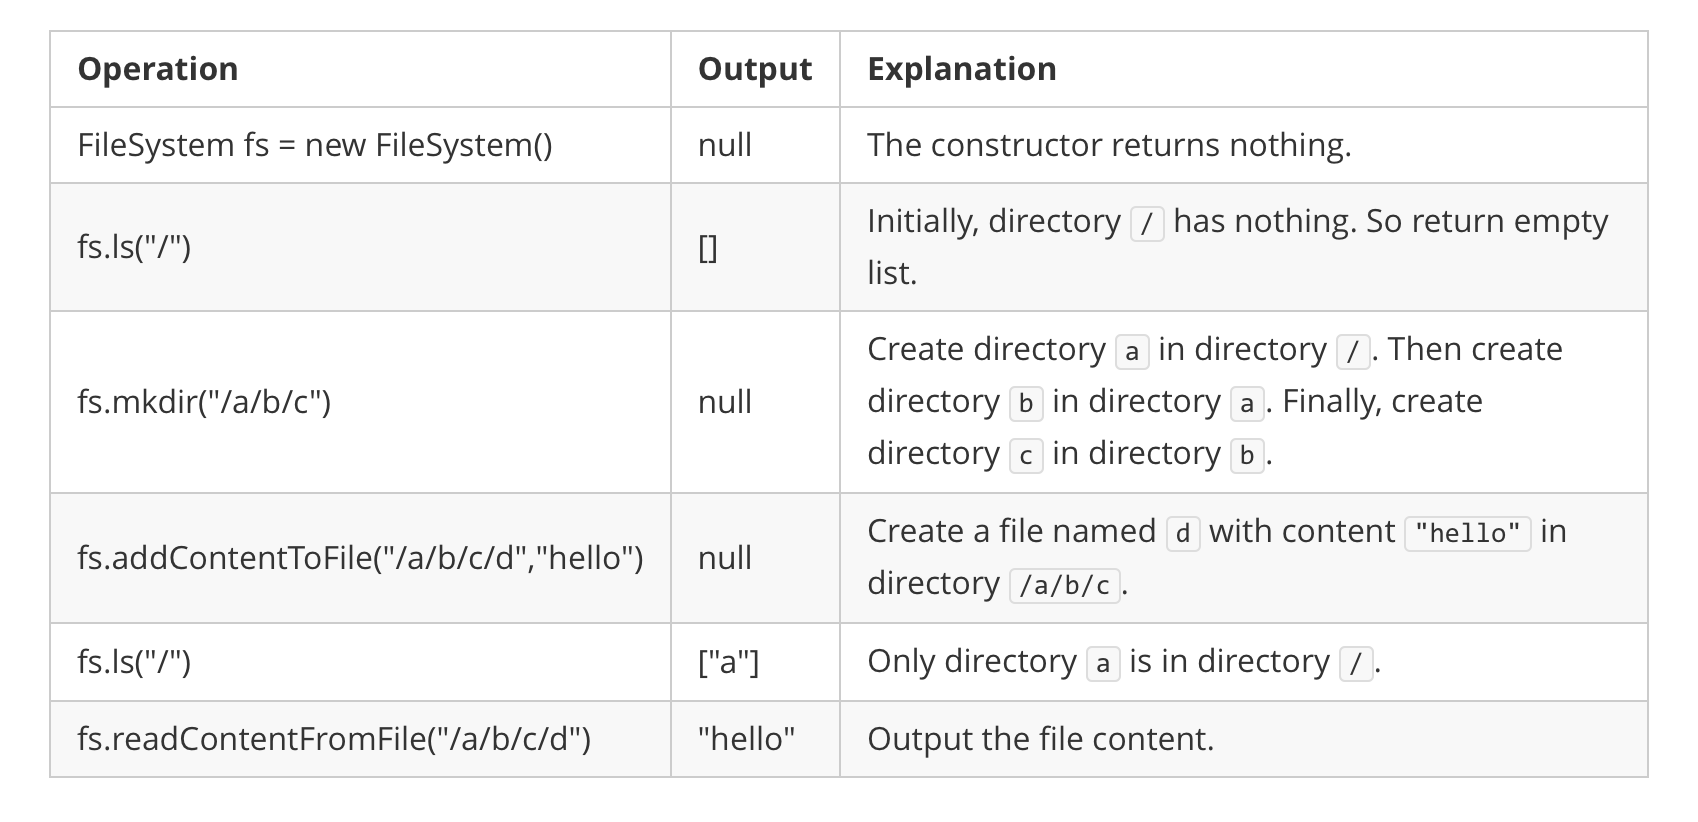

Note:

1. You can assume all file or directory paths are absolute paths which begin with / and do not end with / except that the path is just "/".
1. You can assume that all operations will be passed valid parameters and users will not attempt to retrieve file content or list a directory or file that does not exist.
1. You can assume that all directory names and file names only contain lower-case letters, and same names won't exist in the same directory.



In [1]:
# clean solution from LeetCode：他的 cd 回傳一個 curr 指向當前目錄

from collections import defaultdict

class Node:
    def __init__(self):
        self.children = defaultdict(Node)
        self.content = None

class FileSystem:
    def __init__(self):
        self.root = Node()

    def cd(self, path):
        curr = self.root
        if len(path) == 1:
            return curr
        
        for e in path.split('/')[1:]:
            curr = curr.children[e]
        return curr

    def ls(self, path):
        curr = self.cd(path)
        if curr.content:
            return path.split('/')[-1:]

        return sorted(curr.children.keys())

    def mkdir(self, path):
        self.cd(path)

    def addContentToFile(self, filepath, content):
        curr = self.cd(filepath)
        if curr.content:
            curr.content += content
        else:
            curr.content = content

    def readContentFromFile(self, filepath):
        curr = self.cd(filepath)
        return curr.content

    
from pandas import DataFrame

methods = ["FileSystem","mkdir","ls","mkdir","ls","ls","ls","addContentToFile","ls","ls","ls"]
argList = [[],["/m"],["/m"],["/w"],["/"],["/w"],["/"],["/dycete","emer"],["/w"],["/"],["/dycete"]]

fs = FileSystem()
DataFrame([(method, args, getattr(fs, method)(*args)) for method, args in zip(methods[1:], argList[1:])], columns=['method', 'args', 'result'])

,method,args,result
0,mkdir,[/m],None
1,ls,[/m],[]
2,mkdir,[/w],None
3,ls,[/],"[m, w]"
4,ls,[/w],[]
5,ls,[/],"[m, w]"
6,addContentToFile,"[/dycete, emer]",None
7,ls,[/w],[]
8,ls,[/],"[dycete, m, w]"
9,ls,[/dycete],[dycete]


## 259. 3Sum Smaller

Medium

Given an array of n integers nums and an integer target, find the number of index triplets i, j, k with 0 <= i < j < k < n that satisfy the condition nums[i] + nums[j] + nums[k] < target.

Follow up: Could you solve it in O(n^2) runtime?


Example 1:

    Input: nums = [-2,0,1,3], target = 2
    Output: 2
    Explanation: Because there are two triplets which sums are less than 2:
    [-2,0,1]
    [-2,0,3]

Constraints:

    n == nums.length
    0 <= n <= 300
    -100 <= nums[i] <= 100
    -100 <= target <= 100

In [5]:
# clean solution copied from LeetCode 

nums = [-2,0,1,3]
target = 2

def threeSumSmaller(nums, target):
    if len(nums) < 3:
        return 0

    nums = sorted(nums)
    n = len(nums)
    count = 0

    for i in range(n-2):
        if nums[i] + nums[i+1] + nums[i+2] >= target: 
            break

        lo, hi = i+1, n-1
        goal = target - nums[i]
        while lo < hi:
            total = nums[lo] + nums[hi]
            if goal > total:
                count += hi - lo
                lo += 1
            else:
                hi -= 1

    return count
    
threeSumSmaller(nums, target)

2

In [6]:
# clean solution using twoSumSmaller, copied from LeetCode 

nums = [-2,0,1,3]
target = 2

def twoSumSmaller(nums, startIndex, target):
    count = 0
    left = startIndex
    right = len(nums) - 1
    while left < right:
        if nums[left] + nums[right] < target:
            count += right - left
            left += 1
        else:
            right -= 1
    return count    

def threeSumSmaller(nums, target):
    nums.sort()
    count = 0
    for i in range(len(nums)):
        count += twoSumSmaller(nums, i + 1, target - nums[i])

    return count

threeSumSmaller(nums, target)

2

## 460. LFU Cache

Hard

Design and implement a data structure for a Least Frequently Used (LFU) cache.

Implement the LFUCache class:

* ```LFUCache(int capacity)``` Initializes the object with the ```capacity``` of the data structure.
* ```int get(int key)``` Gets the value of the ```key``` if the ```key``` exists in the cache. Otherwise, returns -1.
* ```void put(int key, int value)``` Update the value of the ```key``` if present, or inserts the ```key``` if not already present. When the cache reaches its ```capacity```, it should invalidate and remove the least frequently used key before inserting a new item. For this problem, when there is a tie (i.e., two or more keys with the same frequency), the least recently used ```key``` would be invalidated.

To determine the least frequently used key, a use counter is maintained for each key in the cache. The key with the smallest use counter is the least frequently used key.

When a key is first inserted into the cache, its use counter is set to 1 (due to the put operation). The use counter for a key in the cache is incremented either a get or put operation is called on it.

 

Example 1:

    Input
    ["LFUCache", "put", "put", "get", "put", "get", "get", "put", "get", "get", "get"]
    [[2], [1, 1], [2, 2], [1], [3, 3], [2], [3], [4, 4], [1], [3], [4]]
    Output
    [null, null, null, 1, null, -1, 3, null, -1, 3, 4]

    Explanation
    // cnt(x) = the use counter for key x
    // cache=[] will show the last used order for tiebreakers (leftmost element is  most recent)
    LFUCache lfu = new LFUCache(2);
    lfu.put(1, 1);   // cache=[1,_], cnt(1)=1
    lfu.put(2, 2);   // cache=[2,1], cnt(2)=1, cnt(1)=1
    lfu.get(1);      // return 1
                     // cache=[1,2], cnt(2)=1, cnt(1)=2
    lfu.put(3, 3);   // 2 is the LFU key because cnt(2)=1 is the smallest, invalidate 2.
                     // cache=[3,1], cnt(3)=1, cnt(1)=2
    lfu.get(2);      // return -1 (not found)
    lfu.get(3);      // return 3
                     // cache=[3,1], cnt(3)=2, cnt(1)=2
    lfu.put(4, 4);   // Both 1 and 3 have the same cnt, but 1 is LRU, invalidate 1.
                     // cache=[4,3], cnt(4)=1, cnt(3)=2
    lfu.get(1);      // return -1 (not found)
    lfu.get(3);      // return 3
                     // cache=[3,4], cnt(4)=1, cnt(3)=3
    lfu.get(4);      // return 4
                     // cache=[3,4], cnt(4)=2, cnt(3)=3

Constraints:

    0 <= capacity, key, value <= 10^4
    At most 10^5 calls will be made to get and put.

 
Follow up: Could you do both operations in O(1) time complexity?

In [1]:
# 用一個字典存每個 key 當前的頻率，
# 然後每一個頻率都用一個 OrderedDict 存對應到該頻率的所有 items
# put 和 get 都會影響到頻率所以要去改對應的 OrderedDicts

# 用一個變數記下當前最低頻率用來 delete LFU item

import collections

class LFUCache:

    def __init__(self, capacity):
        self.capacity = capacity
        self.size = 0
        self.key_freq_map = {}
        self.freq_val_map = collections.defaultdict(collections.OrderedDict)
        self.min_freq = float('inf')
    
    def update_freq(self, key):
        freq = self.key_freq_map[key]
        value = self.freq_val_map[freq].pop(key)
        
        self.key_freq_map[key] = freq + 1
        self.freq_val_map[freq + 1][key] = value
        
        if self.min_freq == freq and len(self.freq_val_map[self.min_freq]) == 0:
            self.min_freq += 1
    
    def get(self, key):
        if key in self.key_freq_map:
            freq = self.key_freq_map[key]
            value = self.freq_val_map[freq][key]
            self.update_freq(key)
            return value
        else:
            return -1
        
    def put(self, key, value):
        if self.capacity == 0:
            return
        
        if key in self.key_freq_map:
            freq = self.key_freq_map[key]
            self.freq_val_map[freq][key] = value
            self.update_freq(key)
        else:
            if self.capacity == self.size:
                keyToDelete, _ = self.freq_val_map[self.min_freq].popitem(last=False)
                del self.key_freq_map[keyToDelete]
                self.size -= 1
                
            self.key_freq_map[key] = 1
            self.freq_val_map[1][key] = value
            self.min_freq = 1
            self.size += 1
        

methods = ["LFUCache","put","put","get","put","get","get","put","get","get","get"]
argList = [[2],[1,1],[2,2],[1],[3,3],[2],[3],[4,4],[1],[3],[4]]

from pandas import DataFrame
cache = LFUCache(2)
DataFrame([(method, args, getattr(cache, method)(*args)) for method, args in zip(methods[1:], argList[1:])], columns=['method', 'args', 'result'])

,method,args,result
0,put,"[1, 1]",NaN
1,put,"[2, 2]",NaN
2,get,[1],1.0
3,put,"[3, 3]",NaN
4,get,[2],-1.0
5,get,[3],3.0
6,put,"[4, 4]",NaN
7,get,[1],-1.0
8,get,[3],3.0
9,get,[4],4.0


## 239. Sliding Window Maximum
Hard

You are given an array of integers nums, there is a sliding window of size k which is moving from the very left of the array to the very right. You can only see the k numbers in the window. Each time the sliding window moves right by one position.

Return the max sliding window.

 

    Example 1:

    Input: nums = [1,3,-1,-3,5,3,6,7], k = 3
    Output: [3,3,5,5,6,7]
    Explanation: 
    Window position                Max
    ---------------               -----
    [1  3  -1] -3  5  3  6  7       3
     1 [3  -1  -3] 5  3  6  7       3
     1  3 [-1  -3  5] 3  6  7       5
     1  3  -1 [-3  5  3] 6  7       5
     1  3  -1  -3 [5  3  6] 7       6
     1  3  -1  -3  5 [3  6  7]      7


In [6]:
# deque solution: https://www.youtube.com/watch?v=aZ7CD0j35QI

from collections import deque

nums = [1, 3, -1, -3, 5, 3, 6, 7]
k = 3

def maxSlidingWindow(nums, k):
    q = deque([])
    res = []
    
    for i, n in enumerate(nums):
        if i >= k and nums[i-k] == q[0]:
            q.popleft()
            
        while q and n > q[-1]:
            q.pop()
        q.append(n)
        
        res.append(q[0])
        
    return res[k-1:]

maxSlidingWindow(nums, k)

[3, 3, 5, 5, 6, 7]

## 44. Wildcard Matching

Hard

Given an input string (s) and a pattern (p), implement wildcard pattern matching with support for '?' and '*' where:

    '?' Matches any single character.
    '*' Matches any sequence of characters (including the empty sequence).

The matching should cover the entire input string (not partial).

Example 4:

    Input: s = "adceb", p = "*a*b"
    Output: true
    Explanation: The first '*' matches the empty sequence, while the second '*' matches the substring "dce".


以下答案有錯！

In [16]:
# s = 'adceb'
# p = '*a*b'

# s = 'aa'
# p = '*'

# s = "mississippi"
# p = "m??*ss*?i*pi"

# s = 'aa'
# p = 'a*'

# s = "aaaa"
# p = "***a"

s = "ab"
p = "*a"

def isMatchQ(s, i, p):
    '''
    Check if s[i, i + len(p)] and p are a match
    This version only supports '?'
    '''
    for k, c in enumerate(p):
        if c not in ['?', s[i+k]]:
            return False
    return True

def isMatch(s, p):
    i = 0    # index of s
    for subp in p.split('*'):    
        n = len(subp)  
        while True:
            if i + n > len(s):
                print(False)
                break
            if isMatchQ(s, i, subp):
                i += n
                break
            i += 1

    return i in [0, len(s)] or '*' in [p[1], p[-1]]


## 105. Construct Binary Tree from Preorder and Inorder Traversal

Medium

Given preorder and inorder traversal of a tree, construct the binary tree.

Note:
You may assume that duplicates do not exist in the tree.

For example, given

    preorder = [3,9,20,15,7]
    inorder = [9,3,15,20,7]

Return the following binary tree:

     3
    / \
    9  20
      /  \ 
     15   7



In [ ]:
# recursive solution, slow (37%)

preorder = [3, 9, 20, 15, 7]
inorder = [9, 3, 15, 20, 7]

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def buildTree(preorder, inorder):
    if len(preorder)==len(inorder)==0: 
        return None
    else:
        val = preorder[0]
        rootIdx = inorder.index(val)
        
        leftInorder = inorder[:rootIdx]
        rightInorder = inorder[rootIdx+1:]
        
        leftPreorder = preorder[1:1+len(leftInorder)]
        rightPreorder = preorder[1+len(leftInorder):]
        
        return TreeNode(val=val, 
                        left=buildTree(leftPreorder, leftInorder), 
                        right=buildTree(rightPreorder, rightInorder))

buildTree(preorder, inorder)

## 146. LRU Cache

Medium

Design a data structure that follows the constraints of a Least Recently Used (LRU) cache.

Implement the LRUCache class:

* ```LRUCache(int capacity)``` Initialize the LRU cache with positive size ```capacity```.
* ```int get(int key)``` Return the value of the ```key``` if the ```key``` exists, otherwise return -1.
* ```void put(int key, int value)``` Update the value of the ```key``` if the ```key``` exists. Otherwise, add the key-value pair to the cache. If the number of keys exceeds the ```capacity``` from this operation, evict the least recently used key.

Follow up:
Could you do get and put in O(1) time complexity?


Example 1:

    Input
    ["LRUCache", "put", "put", "get", "put", "get", "put", "get", "get", "get"]
    [[2], [1, 1], [2, 2], [1], [3, 3], [2], [4, 4], [1], [3], [4]]
    Output
    [null, null, null, 1, null, -1, null, -1, 3, 4]

    Explanation
    LRUCache lRUCache = new LRUCache(2);
    lRUCache.put(1, 1); // cache is {1=1}
    lRUCache.put(2, 2); // cache is {1=1, 2=2}
    lRUCache.get(1);    // return 1
    lRUCache.put(3, 3); // LRU key was 2, evicts key 2, cache is {1=1, 3=3}
    lRUCache.get(2);    // returns -1 (not found)
    lRUCache.put(4, 4); // LRU key was 1, evicts key 1, cache is {4=4, 3=3}
    lRUCache.get(1);    // return -1 (not found)
    lRUCache.get(3);    // return 3
    lRUCache.get(4);    // return 4 

Constraints:

    1 <= capacity <= 3000
    0 <= key <= 3000
    0 <= value <= 10^4
    At most 3 * 10^4 calls will be made to get and put.


In [2]:
# 直覺會寫成用一個 member 存 OrderedDict 但應該直接繼承比較 make sense

import collections   # OrderedDict

class LRUCache(collections.OrderedDict):

    def __init__(self, capacity):
        self.capacity = capacity

    def get(self, key):
        if key in self:
            self.move_to_end(key)
            return self[key]
        else:
            return -1

    def put(self, key, value):    
        self[key] = value
        self.move_to_end(key)
        
        if len(self) > self.capacity:
            self.popitem(last=False)


methods = ["LRUCache", "put", "put", "get", "put", "get", "put", "get", "get", "get"]
argList = [[2], [1, 1], [2, 2], [1], [3, 3], [2], [4, 4], [1], [3], [4]]            

from pandas import DataFrame
cache = LRUCache(2)
DataFrame([(method, args, getattr(cache, method)(*args)) for method, args in zip(methods[1:], argList[1:])], columns=['method', 'args', 'result'])

,method,args,result
0,put,"[1, 1]",NaN
1,put,"[2, 2]",NaN
2,get,[1],1.0
3,put,"[3, 3]",NaN
4,get,[2],-1.0
5,put,"[4, 4]",NaN
6,get,[1],-1.0
7,get,[3],3.0
8,get,[4],4.0


## 380. Insert Delete GetRandom O(1)

Medium

Implement the RandomizedSet class:

* ```bool insert(int val)``` Inserts an item ```val``` into the set if not present. Returns ```true``` if the item was not present, ```false``` otherwise.
* ```bool remove(int val)``` Removes an item ```val``` from the set if present. Returns ```true``` if the item was present, ```false``` otherwise.
* ```int getRandom()``` Returns a random element from the current set of elements (it's guaranteed that at least one element exists when this method is called). Each element must have the same probability of being returned.

Follow up: Could you implement the functions of the class with each function works in average O(1) time?
 

Example 1:

    Input
    ["RandomizedSet", "insert", "remove", "insert", "getRandom", "remove", "insert", "getRandom"]
    [[], [1], [2], [2], [], [1], [2], []]
    Output
    [null, true, false, true, 2, true, false, 2]

    Explanation
    RandomizedSet randomizedSet = new RandomizedSet();
    randomizedSet.insert(1); // Inserts 1 to the set. Returns true as 1 was inserted successfully.
    randomizedSet.remove(2); // Returns false as 2 does not exist in the set.
    randomizedSet.insert(2); // Inserts 2 to the set, returns true. Set now contains [1,2].
    randomizedSet.getRandom(); // getRandom() should return either 1 or 2 randomly.
    randomizedSet.remove(1); // Removes 1 from the set, returns true. Set now contains [2].
    randomizedSet.insert(2); // 2 was already in the set, so return false.
    randomizedSet.getRandom(); // Since 2 is the only number in the set, getRandom() will always return 2.


Constraints:

    -2^31 <= val <= 2^31 - 1
    At most 105 calls will be made to insert, remove, and getRandom.
    There will be at least one element in the data structure when getRandom is called.

In [12]:
# fastest solution on LeetCode
# 用一個字典存 array 裡的對應的數的 idx，
# remove 的時候先把 array 裡這個位置的數字和最後一個數交換再 remove 最後一個數
# 要用 array.pop() 才是 O(1)

import random

class RandomizedSet:

    def __init__(self):
        self.elems = []
        self.elems_to_index = {}

    def insert(self, val):
        if val in self.elems_to_index:
            return False
        self.elems_to_index[val] = len(self.elems)
        self.elems.append(val)
        return True

    def remove(self, val):
        if val in self.elems_to_index:
            pos = self.elems_to_index[val]
            last_pos = len(self.elems) - 1
            self.elems[pos] = self.elems[last_pos]     # Move the last element to the current position.
            self.elems_to_index[self.elems[pos]] = pos
            self.elems.pop()                    # Delete last pos.
            del self.elems_to_index[val]
            return True
        return False
    
    def getRandom(self):
        return random.choice(self.elems)

## 127. Word Ladder

Hard

A transformation sequence from word ```beginWord``` to word ```endWord``` using a dictionary ```wordList``` is a sequence of words such that:

* The first word in the sequence is ```beginWord```.
* The last word in the sequence is ```endWord```.
* Only one letter is different between each adjacent pair of words in the sequence.
* Every word in the sequence is in ```wordList```.

Given two words, ```beginWord``` and ```endWord```, and a dictionary ```wordList```, return the number of words in the shortest transformation sequence from ```beginWord``` to ```endWord```, or 0 if no such sequence exists.

Example 1:

    Input: beginWord = "hit", endWord = "cog", wordList = ["hot","dot","dog","lot","log","cog"]
    Output: 5
    Explanation: One shortest transformation is "hit" -> "hot" -> "dot" -> "dog" -> "cog" with 5 words.
    
Constraints:

    1 <= beginWord.length <= 10
    endWord.length == beginWord.length
    1 <= wordList.length <= 5000
    wordList[i].length == beginWord.length
    beginWord, endWord, and wordList[i] consist of lowercase English letters.
    beginWord != endWord
    All the strings in wordList are unique.

In [2]:
beginWord = "hit"
endWord = "cog"
wordList = ["hot","dot","dog","lot","log","cog"]

def ladderLength(beginWord, endWord, wordList):
    pass

## 297. Serialize and Deserialize Binary Tree

Hard

Serialization is the process of converting a data structure or object into a sequence of bits so that it can be stored in a file or memory buffer, or transmitted across a network connection link to be reconstructed later in the same or another computer environment.

Design an algorithm to serialize and deserialize a binary tree. There is no restriction on how your serialization/deserialization algorithm should work. You just need to ensure that a binary tree can be serialized to a string and this string can be deserialized to the original tree structure.

Clarification: The input/output format is the same as how LeetCode serializes a binary tree. You do not necessarily need to follow this format, so please be creative and come up with different approaches yourself.

 
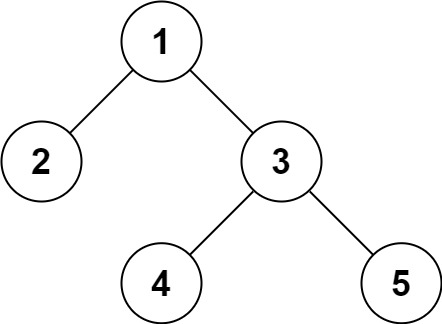

Example 1:

    Input: root = [1,2,3,null,null,4,5]
    Output: [1,2,3,null,null,4,5]

Constraints:

    The number of nodes in the tree is in the range [0, 10^4].
    -1000 <= Node.val <= 1000



In [ ]:
# accepted but slow (5%)
# 
# serialize 只是回傳 inorder 和 preorder 的結果，
# deserialize 根據 inorder 和 preorder 重建 tree，用的是 LeetCode 105
# LeetCode 105 假設 tree 裡沒有重覆值，
# 所以這裡要先做 encoding 把 3 變成 (3, 1), (3, 2), ... 再計算 inorder 和 preorder
# 重建的時候也要做 decoding 

from ast import literal_eval

# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Codec:

    def __init__(self): 
        self.count = {}
    
    def encoding(self, root):
        if root:
            if root.val not in self.count:
                self.count[root.val] = 0
            
            self.count[root.val] += 1
            root.val = (root.val, self.count[root.val])
            self.encoding(root.left)
            self.encoding(root.right)
    
    def decoding(self, root):
        if root:
            root.val = root.val[0]
            self.decoding(root.left)
            self.decoding(root.right)
    
    def serialize(self, root):
        self.encoding(root)
        inorder = self.inorderTraversal(root)
        preorder = self.preorderTraversal(root)
        return str((preorder, inorder))

    def deserialize(self, data):
        root = self.buildTree(*literal_eval(data))
        self.decoding(root)
        return root
    
    def preorderTraversal(self, root):
        if not root:
            return []
        else:
            return [root.val] + self.preorderTraversal(root.left) + self.preorderTraversal(root.right)
        
    def inorderTraversal(self, root):
        if not root:
            return []
        else:
            return self.inorderTraversal(root.left) + [root.val] + self.inorderTraversal(root.right)
        
    def buildTree(self, preorder, inorder):
        if len(preorder)==len(inorder)==0: 
            return None
        else:
            val = preorder[0]
            rootIdx = inorder.index(val)

            leftInorder = inorder[:rootIdx]
            rightInorder = inorder[rootIdx+1:]

            leftPreorder = preorder[1:1+len(leftInorder)]
            rightPreorder = preorder[1+len(leftInorder):]

            return TreeNode(val=val, 
                            left=self.buildTree(leftPreorder, leftInorder), 
                            right=self.buildTree(rightPreorder, rightInorder))

        

# Your Codec object will be instantiated and called as such:
# ser = Codec()
# deser = Codec()
# ans = deser.deserialize(ser.serialize(root))

## 200. Number of Islands

Medium

Given an m x n 2d grid map of '1's (land) and '0's (water), return the number of islands.

An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.


Example 1:

    Input: grid = [
      ["1","1","0","0","0"],
      ["1","1","0","0","0"],
      ["0","0","1","0","0"],
      ["0","0","0","1","1"]
    ]
    Output: 3

Constraints:

    m == grid.length
    n == grid[i].length
    1 <= m, n <= 300
    grid[i][j] is '0' or '1'.

In [9]:
grid = [
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"]
]

def numIslands(grid):
    if not grid:
        return 0
    
    m, n = len(grid), len(grid[0])
    
    def paint(i, j):
        grid[i][j] = '0'
        if i > 0   and grid[i-1][j]=='1': paint(i-1, j)
        if i < m-1 and grid[i+1][j]=='1': paint(i+1, j)
        if j > 0   and grid[i][j-1]=='1': paint(i, j-1)
        if j < n-1 and grid[i][j+1]=='1': paint(i, j+1)

    count = 0
    for i in range(m):
        for j in range(n):
            if grid[i][j] == '1':
                count += 1
                paint(i, j)
                
    return count

numIslands(grid)

3

## 98. Validate Binary Search Tree

Medium

Given the root of a binary tree, determine if it is a valid binary search tree (BST).

A valid BST is defined as follows:

* The left subtree of a node contains only nodes with keys less than the node's key.
* The right subtree of a node contains only nodes with keys greater than the node's key.
* Both the left and right subtrees must also be binary search trees.

Example 1:

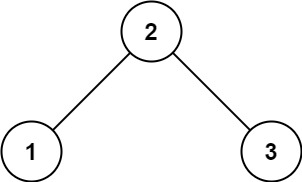

    Input: root = [2,1,3]
    Output: true 

Constraints:

    The number of nodes in the tree is in the range [1, 10^4].
    -2^31 <= Node.val <= 2^31 - 1

In [ ]:
# 檢查 inorder 的結果是否 sorted

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

def isValidBST(root):
    inorder = self.inorder(root)
    return all([inorder[i] < inorder[i+1] for i in range(len(inorder)-1)])

def inorder(root):
    if not root:
        return []
    else:
        return self.inorder(root.left) + [root.val] + self.inorder(root.right)

## 238. Product of Array Except Self

Medium

Given an array nums of n integers where n > 1,  return an array output such that output[i] is equal to the product of all the elements of nums except nums[i].

Example:

    Input:  [1,2,3,4]
    Output: [24,12,8,6]

Constraint: It's guaranteed that the product of the elements of any prefix or suffix of the array (including the whole array) fits in a 32 bit integer.

Note: Please solve it without division and in O(n).

Follow up:
Could you solve it with constant space complexity? (The output array does not count as extra space for the purpose of space complexity analysis.)


In [38]:
'''
1. 在 nums 後面加 1 加到長度為 2^N
2. 建一個 full binary tree 把 nums 填進葉子裡
3. bottom-up 用每一個 node 存兩個 children 的積，除了 root 要保持 1
4. 交換所有 children pair 的值
5. top-down 把每個 node 乘上自己的 parent。回傳原本位置的數字串

下面 m 是 2^N，a 是整個 tree
'''

import numpy as np
from math import log, floor

nums = [1, 2, 3, 4]

def productExceptSelf(nums):
    n = len(nums)
    m = 2**(floor(log(n, 2)) + 1)
    a = np.ones(2*m-1, dtype=int)
    a[m-1:m-1+n] = nums
    
    for i in range(m-2, 0, -1):
        a[i] = a[2*i+1]*a[2*i+2]
    
    for i in range(1, len(a), 2):
        a[i], a[i+1] = a[i+1], a[i]
    
    for i in range(1, len(a)):
        a[i] *= a[(i-1)//2]

    return a[m-1:m-1+n]

productExceptSelf(nums)

array([24, 12,  8,  6])

In [1]:
# fastest and most memory efficient solution on LeetCode
# 準備兩個 cumprod，一個從左到右但要跳過一個，另一個從右到左不跳過。兩數列相乘就是答案

nums = [1, 2, 3, 4]

def productExceptSelf(nums):
    n = len(nums)
    res = [1]
    for i in range(n-1):
        res.append(res[-1] * nums[i])
    
    temp = 1
    for i in range(n-1, -1, -1):
        res[i] *= temp
        temp *= nums[i]
    return res

productExceptSelf(nums)

[24, 12, 8, 6]

## 628. Maximum Product of Three Numbers

Easy

Given an integer array nums, find three numbers whose product is maximum and return the maximum product.


Example 1:

    Input: nums = [1,2,3]
    Output: 6 

Constraints:

    3 <= nums.length <= 10^4
    -1000 <= nums[i] <= 1000



In [32]:
import copy

nums = [1, 2, 3]

def maximumProduct(nums):
    a = copy.copy(nums)
    
    M1 = max(a)
    a.remove(M1)
    M2 = max(a)
    a.remove(M2)
    M3 = max(a)
    a.remove(M3)
    
    m1 = min(nums)
    nums.remove(m1)
    m2 = min(nums)
    nums.remove(m2)
    
    return max(M1*M2*M3, M1*m1*m2)
    
maximumProduct(nums)

6

## 1048. Longest String Chain

Medium

Given a list of words, each word consists of English lowercase letters.

Let's say word1 is a predecessor of word2 if and only if we can add exactly one letter anywhere in word1 to make it equal to word2.  For example, "abc" is a predecessor of "abac".

A word chain is a sequence of words [word_1, word_2, ..., word_k] with k >= 1, where word_1 is a predecessor of word_2, word_2 is a predecessor of word_3, and so on.

Return the longest possible length of a word chain with words chosen from the given list of words.

 

Example 1:

    Input: words = ["a","b","ba","bca","bda","bdca"]
    Output: 4
    Explanation: One of the longest word chain is "a","ba","bda","bdca".
 
Constraints:

    1 <= words.length <= 1000
    1 <= words[i].length <= 16
    words[i] only consists of English lowercase letters.



In [21]:
# 看到 bdca，分別問 dca，bca，bdc 在不在字典裡
# 字典要照字的長度的順序建

words = ["a","b","ba","bca","bda","bdca"]

def longestStrChain(words):
    words = sorted(words, key=len)
    
    lenChain = {} 
    for word in words:
        lenChain[word] = max(1 + lenChain.get(word[:i] + word[i+1:], 0) for i in range(len(word)))

    return max(lenChain.values())

longestStrChain(words)

4

## 362. Design Hit Counter

Medium

Design a hit counter which counts the number of hits received in the past 5 minutes.

Each function accepts a timestamp parameter (in seconds granularity) and you may assume that calls are being made to the system in chronological order (ie, the timestamp is monotonically increasing). You may assume that the earliest timestamp starts at 1.

It is possible that several hits arrive roughly at the same time.

Example:

    HitCounter counter = new HitCounter();

    // hit at timestamp 1.
    counter.hit(1);

    // hit at timestamp 2.
    counter.hit(2);

    // hit at timestamp 3.
    counter.hit(3);

    // get hits at timestamp 4, should return 3.
    counter.getHits(4);

    // hit at timestamp 300.
    counter.hit(300);

    // get hits at timestamp 300, should return 4.
    counter.getHits(300);

    // get hits at timestamp 301, should return 3.
    counter.getHits(301); 

Follow up:
What if the number of hits per second could be very large? Does your design scale?

In [ ]:
# naive dictionary solution; slow but accepted

class HitCounter:
    def __init__(self):
        self.count = {}

    def hit(self, timestamp):
        self.count[timestamp] = 1 + self.count.get(timestamp, 0)

    def getHits(self, timestamp):
        return sum([self.count[i] for i in range(max(0, timestamp+1-300), timestamp+1) if i in self.count])

In [ ]:
# LeetCode 上最快的解答：記下所有 hit 的 timestamp，
# 到呼叫 getHits 時再用 binary search 找最近 300 秒裡有多少個 timestamp

from bisect import bisect_left, bisect_right

class HitCounter:
    def __init__(self):
        self._timestamps = []
        
    def hit(self, timestamp):
        self._timestamps.append(timestamp)
        
    def getHits(self, timestamp):
        last_index = bisect_left(self._timestamps, timestamp + 1) 
        first_index = bisect_right(self._timestamps, timestamp - 300)
        return max(0, last_index - first_index)

## 85. Maximal Rectangle

Hard

Given a rows x cols binary matrix filled with 0's and 1's, find the largest rectangle containing only 1's and return its area.
 

Example 1:

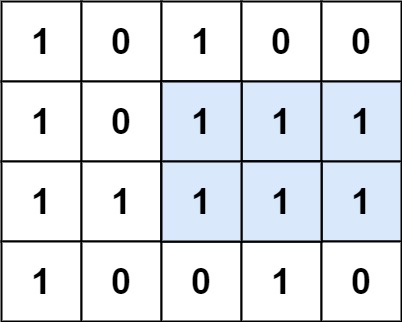

    Input: matrix = [["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["1","0","0","1","0"]]
    Output: 6
    Explanation: The maximal rectangle is shown in the above picture.

Constraints:

    rows == matrix.length
    cols == matrix.length
    0 <= row, cols <= 200
    matrix[i][j] is '0' or '1'.

下面答案有錯！

In [4]:
import numpy as np

matrix = [["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["1","0","0","1","0"]]
matrix = [["0","0","1"],["1","1","1"]]
matrix = [["0","0","0","0","0","0","1"],["0","0","0","0","1","1","1"],["1","1","1","1","1","1","1"],["0","0","0","1","1","1","1"]]

def maximalRectangle(matrix):
    m = len(matrix)
    if m==0:
        return 0

    n = len(matrix[0])
    matrix = [['0']*n] + matrix
    for i, row in enumerate(matrix):
        matrix[i] = ['0'] + row

    s = [[[0, 0] for j in range(n+1)] for i in range(m+1)]
    for i in range(1, m+1):
        for j in range(1, n+1):
            if matrix[i][j] != '0':
                if s[i-1][j] != [0, 0] and s[i][j-1] != [0, 0]:                    
                    if min(s[i][j-1][0], s[i-1][j][0] + 1)*(s[i][j-1][1] + 1) > (s[i-1][j][0] + 1)*min(s[i][j-1][1] + 1, s[i-1][j][1]):
                        s[i][j] = [min(s[i][j-1][0], s[i-1][j][0] + 1), s[i][j-1][1] + 1]
                    else:
                        s[i][j] = [s[i-1][j][0] + 1, min(s[i][j-1][1] + 1, s[i-1][j][1])]
                        
                elif s[i-1][j] == [0, 0] and s[i][j-1] != [0, 0]:
                    s[i][j] = [1, s[i][j-1][1] + 1]
                    
                elif s[i-1][j] != [0, 0] and s[i][j-1] == [0, 0]:
                    s[i][j] = [s[i-1][j][0] + 1, 1]
                    
                else:
                    s[i][j] = [1, 1]
    max_area = 0
    for i in range(1, m+1):
        for j in range(1, n+1):
            area = s[i][j][0]*s[i][j][1]
            max_area = max(area, max_area)
            
    return s
#     return max_area

maximalRectangle(matrix)

[[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1]],
 [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [1, 2], [1, 3]],
 [[0, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7]],
 [[0, 0], [0, 0], [0, 0], [0, 0], [2, 1], [2, 2], [2, 3], [2, 4]]]

## 241. Different Ways to Add Parentheses

Medium

Given a string of numbers and operators, return all possible results from computing all the different possible ways to group numbers and operators. The valid operators are +, - and *.

Example 2:

    Input: "2*3-4*5"
    Output: [-34, -14, -10, -10, 10]
    Explanation: 
    (2*(3-(4*5))) = -34 
    ((2*3)-(4*5)) = -14 
    ((2*(3-4))*5) = -10 
    (2*((3-4)*5)) = -10 
    (((2*3)-4)*5) = 10


In [1]:
# divide and conquer + memoization
# eval 和 f-string 比較慢。如果用一個 helper function（裡面是 if op=='+': ...）就會再快一點點。最快解答差不多就是這樣

from ast import literal_eval
from functools import lru_cache

expr = '2*3-4*5'

@lru_cache(maxsize=None)
def diffWaysToCompute(expr):
    opIdx = [i for i, c in enumerate(expr) if c in '+-*']
    if len(opIdx)==0:
        return [eval(expr)]
    else:
        res = []
        for i in opIdx:
            left = diffWaysToCompute(expr[:i])
            right = diffWaysToCompute(expr[i+1:])
            op = expr[i]
            res += [eval(f'({m}) {op} ({n})') for m in left for n in right]
            
        return res
    
diffWaysToCompute(expr)

[-34, -10, -14, -10, 10]

## 867. Transpose Matrix

Easy

Given a matrix A, return the transpose of A.

The transpose of a matrix is the matrix flipped over it's main diagonal, switching the row and column indices of the matrix.

Example 1:

    Input: [[1,2,3],[4,5,6],[7,8,9]]
    Output: [[1,4,7],[2,5,8],[3,6,9]]


In [11]:
# got accepted although the return is list of tuples

A = [[1,2,3],[4,5,6],[7,8,9]]

def transpose(A):
    return list(zip(*A))

transpose(A)

[(1, 4, 7), (2, 5, 8), (3, 6, 9)]

## 188. Best Time to Buy and Sell Stock IV

Hard

You are given an integer array prices where prices[i] is the price of a given stock on the ith day.

Design an algorithm to find the maximum profit. You may complete at most k transactions.

Notice that you may not engage in multiple transactions simultaneously (i.e., you must sell the stock before you buy again).


Example 1:

    Input: k = 2, prices = [2,4,1]
    Output: 2
    Explanation: Buy on day 1 (price = 2) and sell on day 2 (price = 4), profit = 4-2 = 2.

Constraints:

    0 <= k <= 10^9
    0 <= prices.length <= 1000
    0 <= prices[i] <= 1000

In [1]:
# 這個解答的一維陣列版本 https://www.youtube.com/watch?v=oDhu5uGq_ic 

prices = [2, 4, 1]
k = 2

def maxProfit(k, prices):
    if not prices:
        return 0

    n = len(prices)
    t = [0]*n

    for i in range(k):
        maxDiff = -prices[0]
        for j in range(1, n):
            tj_prev = t[j]
            t[j] = max(t[j-1], prices[j] + maxDiff)
            maxDiff = max(maxDiff, tj_prev - prices[j])

    return t[-1]

maxProfit(k, prices)

2

## 724. Find Pivot Index

Easy

Given an array of integers nums, write a method that returns the "pivot" index of this array.

We define the pivot index as the index where the sum of all the numbers to the left of the index is equal to the sum of all the numbers to the right of the index.

If no such index exists, we should return -1. If there are multiple pivot indexes, you should return the left-most pivot index.

Example 1:

    Input: nums = [1,7,3,6,5,6]
    Output: 3
    Explanation:
    The sum of the numbers to the left of index 3 (nums[3] = 6) is equal to the sum of numbers to the right of index 3.
    Also, 3 is the first index where this occurs.

Constraints:

    The length of nums will be in the range [0, 10000].
    Each element nums[i] will be an integer in the range [-1000, 1000].

In [23]:
import numpy as np

nums = [1, 7, 3, 6, 5, 6]

def pivotIndex(nums):
    nums = np.array(nums)
    s1 = nums.cumsum()
    s2 = nums[::-1].cumsum()[::-1]

    for i in range(len(nums)):
        if s1[i]==s2[i]:
            return i
    return -1

pivotIndex(nums)

3